# TikTok Reviews Sentiment Analysis using Python
Dataset : https://www.kaggle.com/datasets/shivkumarganesh/tiktok-google-play-store-review/download

-----

## Business Problems

TikTok adalah salah satu aplikasi media sosial paling populer saat ini. Ini terkenal dengan video pendeknya. Orang sering menggunakan aplikasi ini untuk menonton video yang menghibur dan lucu. Meski isinya menghibur, aplikasi ini tidak disukai semua orang. Jika Anda membaca ulasannya, Anda akan menemukan campuran kebencian dan dukungan untuk TikTok di seluruh dunia. Jadi, mari kita **analisis ulasan TikTok untuk mengetahui apa yang orang rasakan tentang konten aplikasi ini**.

----

In [1]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

data = pd.read_csv("tiktok.csv")
print(data.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

C:\Users\justi\AppData\Local\Temp\ipykernel_7180\1805229953.py:14: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("tiktok.csv")


In [2]:
data = data[["content", "score"]]
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [3]:
data.isnull().sum()

content    16
score       0
dtype: int64

In [4]:
data = data.dropna()

-----

## Text Preprocessing

In [5]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

## Word Cloud

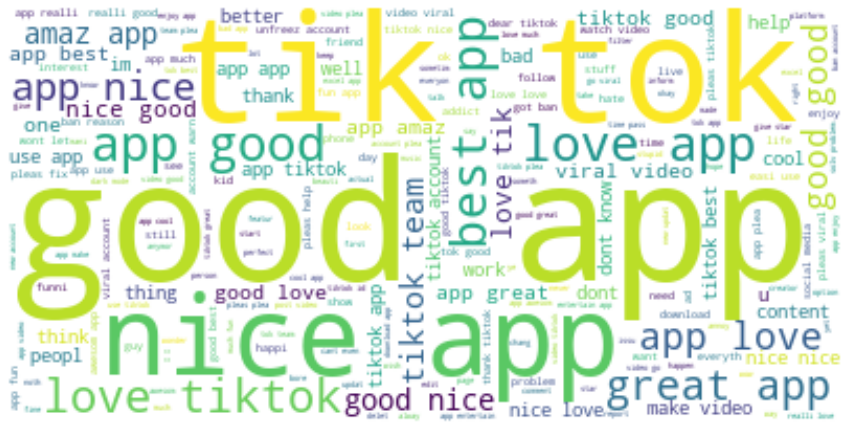

In [6]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Sekarang kita akan menambahkan tiga kolom lagi dalam kumpulan data ini sebagai Positif, Negatif, dan Netral dengan menghitung skor sentimen :

In [7]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...


                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


Sekarang mari kita lihat jenis kata yang digunakan orang dalam ulasan positif TikTok:

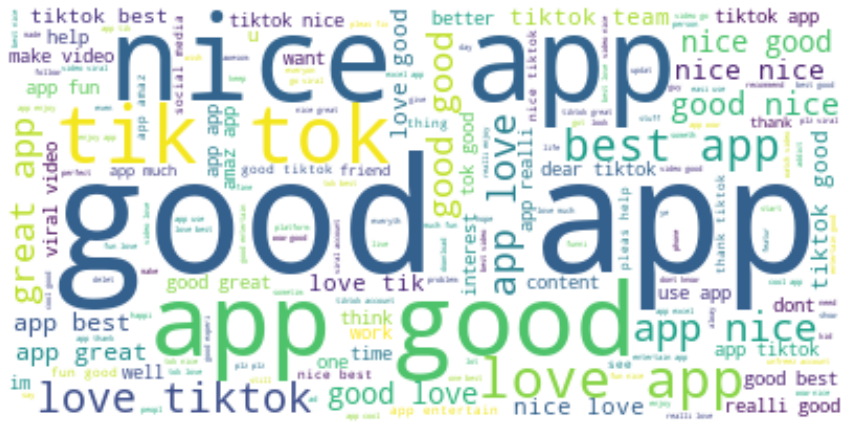

In [8]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Sekarang mari kita lihat kata-kata yang sering digunakan orang dalam ulasan negatif TikTok:

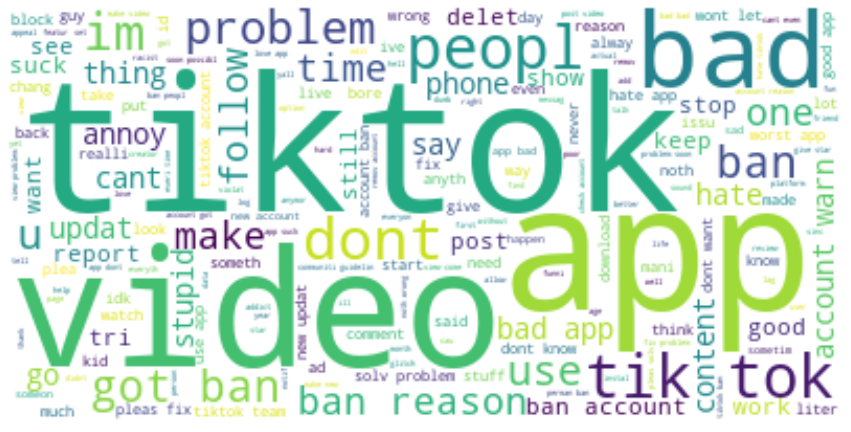

In [9]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Summary

Jadi hasil dari text mining untuk kata kata yang terdapat pada review aplikasi TikTok seperti ada WordCloud di atas, kita membagi kata kata menjadi beberapa kolom untuk melihat komentar positif, netral, dan negatif.